<a href="https://colab.research.google.com/github/divy22x/codsoft/blob/main/LOAN_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOAN PREDICTION APPROVAL USING MACHINE LEARNING

This is a loan prediction project.Using a set of variables, I will predict which of the banks customers are more likely to have their loan application approved. This is a classification problem in Machine Learning, and banks can use these models to assess their customers for loan qualification and fitness.



Logistic Regression
Decision Tree

Confusion Matrix

Random Forest


Data Set Description

There are 13 variables in this data set:

8 categorical variables,

4 continuous variables, and

1 variable to accommodate the loan ID.





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/loan_dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  134
since it is only 22 percent of the entire dataset the rows with missing values are excluded.


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


First we will fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(480, 13)

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(df,df.columns,6,3)

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(df['Gender'],hue=df['Loan_Status'])


Let's replace the Variable values to Numerical form & display the Value Counts The data in Numerical form avoids disturbances in building the model.

label encoding

In [ ]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Married=df.Married.map({'Yes':1,'No':0})
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [ ]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

In [ ]:
df['Married'].value_counts()

In [ ]:
df['Loan_Status'].value_counts()

In [ ]:
df['Dependents'].value_counts()

In [ ]:
df['Education'].value_counts()

In [ ]:
df['Self_Employed'].value_counts()

In [ ]:
df['Property_Area'].value_counts()

In [ ]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)


plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

In [ ]:
plt.figure(figsize=(5,5))
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])

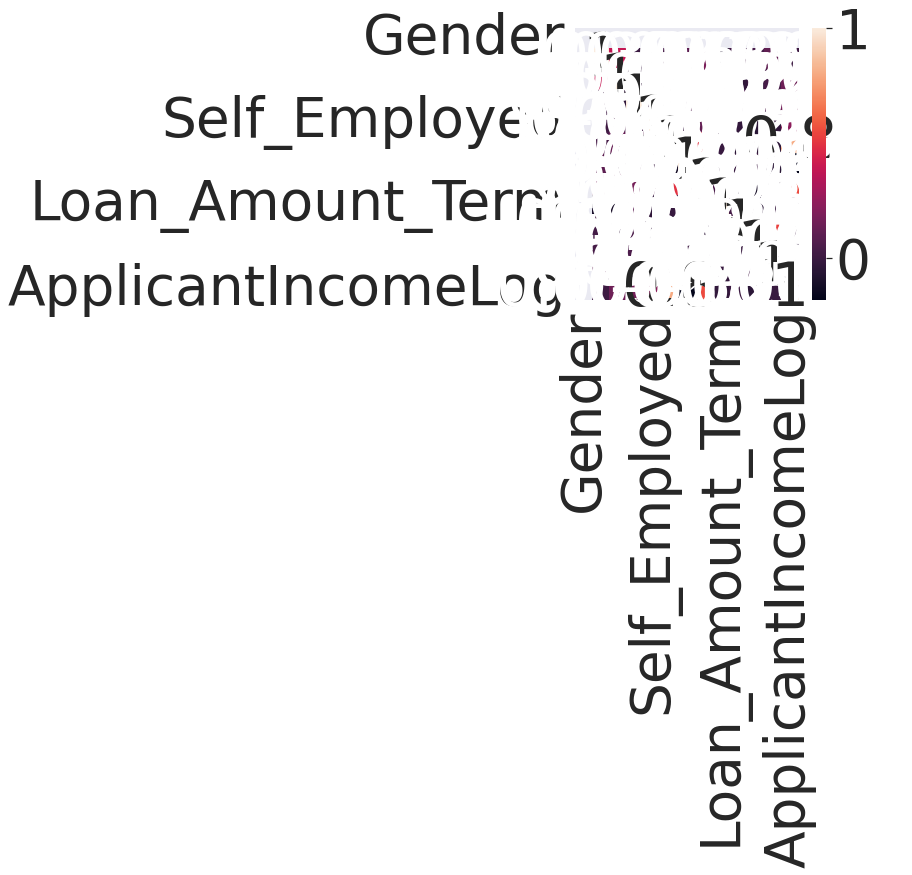

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History

The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.

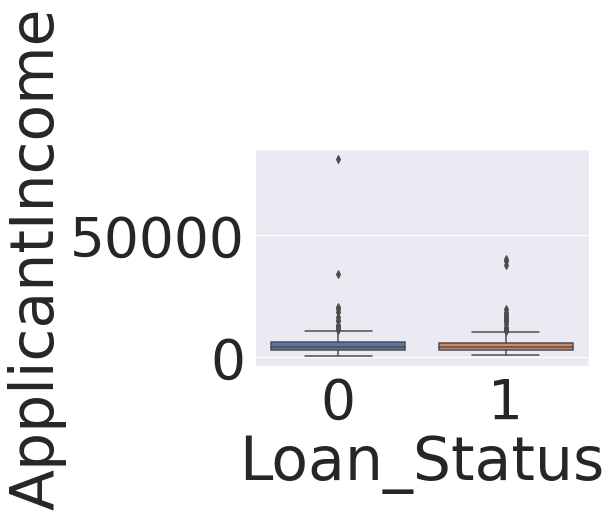

In [ ]:

sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)

It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

In [ ]:

sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df)

 It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed

In [ ]:
sns.boxplot(x= 'Loan_Amount_Term',y='Loan_Status', data=df);

In [ ]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df);

 As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
X=df.iloc[:,1:12].values
y=df.iloc[:,12].values

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

Logistic Regression (LR) Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

in this case we are predicting to loan status.



In [ ]:

model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))


CONCLUSION:

The Loan Status is heavily dependent on the Credit History for Predictions. The Logistic Regression algorithm gives us the maximum Accuracy (87 % approx) compared to the other 3 Machine Learning Classification Algorithms.



confusion  matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.

Predicted probabilities of 0 (Loan_Status No) and 1 ( Loan_Status Yes) for the test data with a default classification threshold of 0.5

Decision Treeee

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

In [ ]:
model = ExtraTreesClassifier()
classify(model, X, y)

Hyperparameter tuning

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

**Naive Bayes**

In [ ]:
import pickle
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
filename = 'gaussian_nb_model.p'

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_test, y_pred))
print("Classification Report for Gaussian Naïve Bayes")
print(classification_report(y_test, y_pred))

pickle.dump(model, open('./'+filename, 'wb'))

In [ ]:
import pickle
with open("LOAN MINI PROJECT.pickle","wb") as f:
  pickle.dump(model,f)
  f.close()

In [ ]:
model=pickle.load(open("LOAN MINI PROJECT.pickle","rb"))


In [ ]:
X=df.iloc[:,1:12].values
y=df.iloc[:,12].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
y1=df.iloc[:,12:13]
y1

In [ ]:
matrix = CountVectorizer(max_features=1000)
vectors = matrix.fit_transform(texts).toarray()
classifier = GaussianNB()
vectors_train, vectors_test, topics_train, topics_test = train_test_split(vectors, topics)
classifier.fit(vectors_train, topics_train)
topics_pred = classifier.predict(vectors_test)

#########THIS IS NOT WORKING###########
from sklearn.feature_extraction.text import CountVectorizer
test_text = ['I like that it keeps the temperature warm so I can warm milk ahead of time before baby crying. ']
test_vec = matrix.transform(test_text).toarray()
res = classifier.predict(test_vec)
print(res)

In [ ]:
print("predicts:"+str(model.predict(y1)))

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred)
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred)
print("Recall score:",recall)
f1=metrics.f1_score(y_test, y_pred)
print("f1score:",f1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
